In [10]:
# Pull in data and save it to a DataFrame

import pandas as pd

# Replace this with the path to your CSV file
file_path = '/Users/christopherfrye/Downloads/fraud_detection.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the headers and the first 5 rows of the CSV
print("Headers:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Display summary statistics for each column
print(df.describe())

Headers: ['actions', 'times', 'execution_time', 'amount', 'device_freq', 'ip_freq', 'beneficiary_freq', 'application_freq', 'is_fraud', 'actiontimemean', 'actiontimestd', 'logamount', 'time_to_first_action', 'actions_str', 'total_time_to_transaction']

First few rows:
                                             actions  \
0  [22, 27, 24, 1, 1268, 1269, 1267, 22, 29, 1, 2...   
1  [22, 24, 27, 1, 1268, 1269, 1267, 2, 23, 6, 25...   
2  [22, 1, 29, 22, 26, 2, 23, 25, 6, 28, 14, 7, 6...   
3  [22, 24, 27, 72, 1269, 1268, 1267, 4, 70, 46, ...   
4  [22, 24, 27, 23, 2, 1269, 1269, 6, 25, 7, 28, ...   

                                               times  execution_time  amount  \
0  [0.0, 33.204, 215.636, 443.415, 72.586, 34.241...             203      13   
1  [0.0, 25.459, 46.236, 428.626, 42.785, 74.158,...             359     310   
2  [0.0, 440.927, 5.785, 46.875, 968.65, 311.757,...             250     350   
3  [0.0, 93.894, 46.81, 548.388, 132.548, 37.844,...             203     3

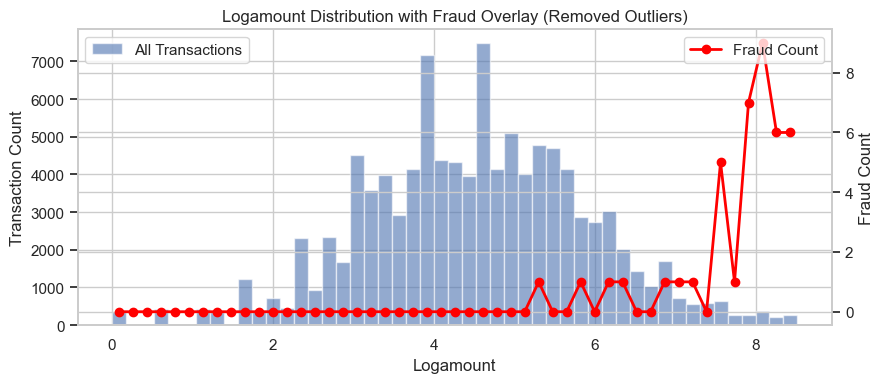

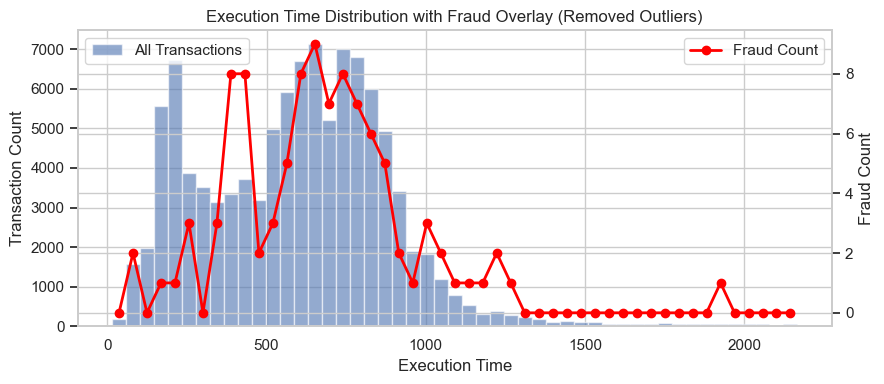

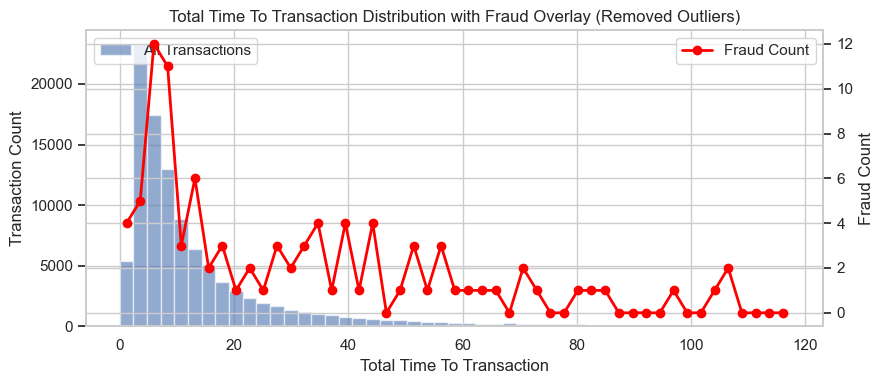

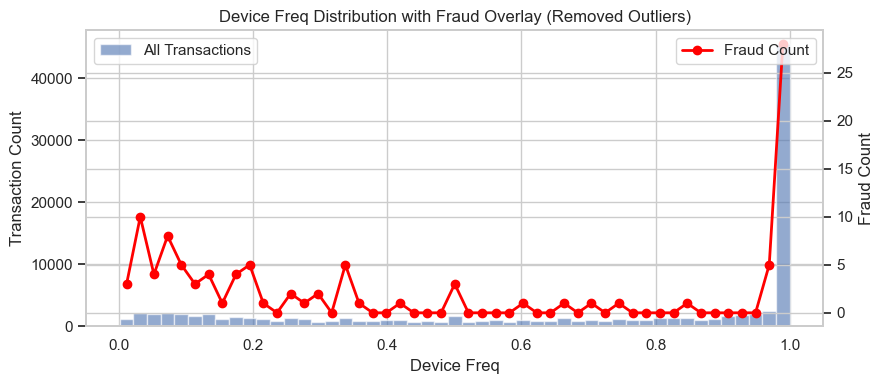

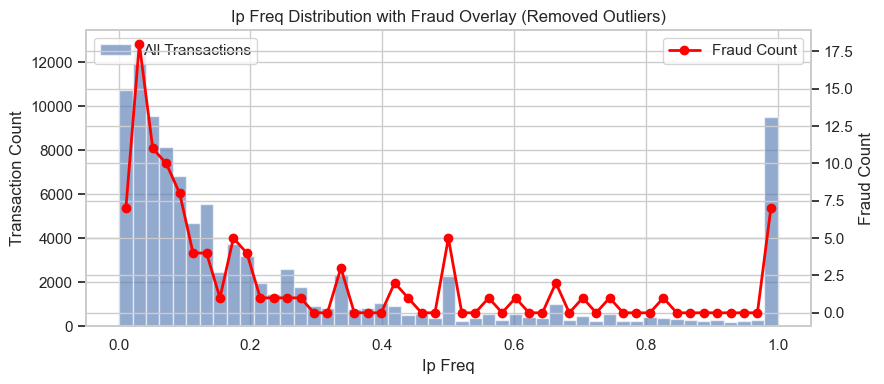

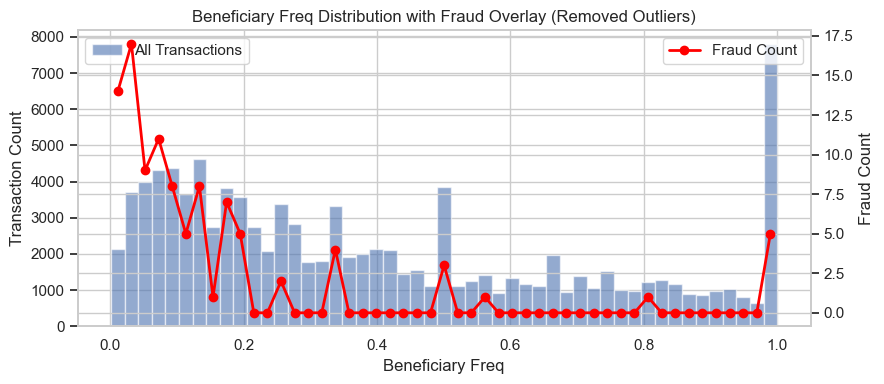

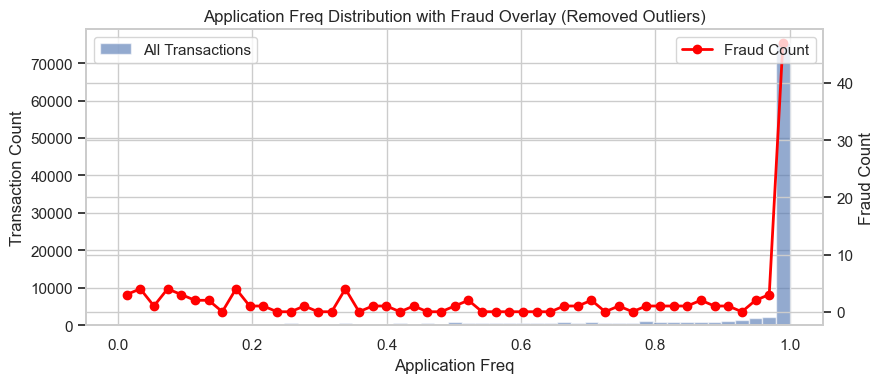

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot feature distribution + fraud counts (with removed outliers)
def plot_feature_with_fraud_overlay(df, feature, bins=50, quantile_cutoff=0.99):
    threshold = df[feature].quantile(quantile_cutoff)
    df_cleaned = df[df[feature] <= threshold]

    bin_edges = np.linspace(df_cleaned[feature].min(), threshold, bins)
    total_counts, _ = np.histogram(df_cleaned[feature], bins=bin_edges)
    fraud_counts, _ = np.histogram(df_cleaned[df_cleaned['is_fraud'] == 1][feature], bins=bin_edges)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    fig, ax1 = plt.subplots(figsize=(9, 4))
    ax1.bar(bin_centers, total_counts, width=np.diff(bin_edges), alpha=0.6, label='All Transactions')
    ax1.set_xlabel(feature.replace('_', ' ').title())
    ax1.set_ylabel('Transaction Count')
    ax1.set_title(f'{feature.replace("_", " ").title()} Distribution with Fraud Overlay (Removed Outliers)')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(bin_centers, fraud_counts, color='red', marker='o', linewidth=2, label='Fraud Count')
    ax2.set_ylabel('Fraud Count')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Step 3: Apply the function to the required features
features_to_plot = [
    'logamount',
    'execution_time',
    'total_time_to_transaction',
    'device_freq',
    'ip_freq',
    'beneficiary_freq',
    'application_freq'
]

for feature in features_to_plot:
    plot_feature_with_fraud_overlay(df, feature)